# Exercise Objective:

Build an image classifier in Keras that detects fashion items from low res images. The training set contains 60,000 grayscale images, each 28x28 pixels. There are 10 classes, all different clothes items.

In this work, you need to:

__Exercise 1__
1. Train a sequential, fully connected neural net to classify the clothes.
2. Assess the performance.

__Exercise 2__
3. Train a sequential, convolutional neural net to classify the clothes.
4. Compare the performance.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

Let's start by loading the fashion mnist dataset as we did back in week 9.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Let's make sure the input pixel data is float64. We'll also split off some validation data.

In [0]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [4]:
X_train.dtype

dtype('float64')

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Let's see what the data looks like. Rerun to see more examples.

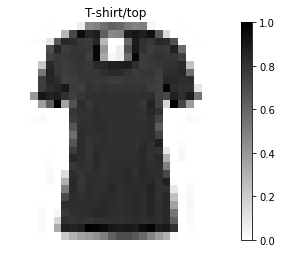

In [6]:
rand_idx = np.random.choice(range(X_train.shape[0]))
plt.imshow(X_train[rand_idx], cmap="binary")
plt.colorbar()
plt.axis('off')
plt.title(class_names[y_train[rand_idx]]);

## Exercise 1
Build the dense model.

In [0]:
## YOUR CODE HERE ##

In [0]:
img_size = (28, 28)
n_classes = 10

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = ## YOUR CODE HERE ##

In [0]:
model.summary()

In [0]:
learning_rate = 0.005
n_epochs = 20

In [0]:
from tensorflow.keras.optimizers import ## YOUR CODE HERE ##

optimizer = ## YOUR CODE HERE ##

In [0]:
# Hint: sparse_categorical_crossentropy is a good loss fn for softmax
model.compile(## YOUR CODE HERE ##)

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

save_cb = ModelCheckpoint(## YOUR CODE HERE ##)

In [0]:
history = model.fit(## YOUR CODE HERE ##)

In [0]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1);

Evaluate the model.

In [0]:
y_hat = ## YOUR CODE HERE ##

In [0]:
def plot_prediction():
    rand_idx = np.random.choice(range(X_test.shape[0]))
    image = X_test[rand_idx].squeeze()
    prediction = class_names[y_hat[rand_idx]]
    actual = class_names[y_test[rand_idx]]

    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(f"Prediction: {prediction} (Actual: {actual})")

plot_prediction()

In [0]:
from sklearn.metrics import ## YOUR CODE HERE ##

## YOUR CODE HERE ##

## Exercise 2

__NOTE:__
It is important to add a channel dimension to images going into convolutions, even if that dimension is simply 1 (greyscale). You can unsqueeze the numpy array like so:

In [0]:
X_train.shape

In [0]:
X_train = X_train[..., None]
X_valid = X_valid[..., None]
X_test = X_test[..., None]

In [0]:
X_train.shape

Build the convolutional model.

In [0]:
## YOUR CODE HERE ##

In [0]:
img_size = (28, 28, 1)

In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

model = ## YOUR CODE HERE ##

In [0]:
model.summary()

In [0]:
model.compile(## YOUR CODE HERE ##)

save_cb = ModelCheckpoint(## YOUR CODE HERE ##)

In [0]:
history = model.fit(## YOUR CODE HERE ##)

In [0]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1);

Evaluate the model.

In [0]:
## YOUR CODE HERE ##

In [0]:
y_hat = ## YOUR CODE HERE ##

In [0]:
plot_prediction()

In [0]:
## YOUR CODE HERE ##